In [1]:
import sys
sys.path.append("G:/DREAM/from_github/PAMFluo")  # path contains python_file.py

from VoltageIntensityClass import VoltageIntensity
import pandas as pd
import numpy as np
import alienlab.utils
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename, askopenfilenames, askdirectory
import alienlab.plot
from alienlab.utils import *
from alienlab.regression_func import *
import json
#from VoltageIntensityClass import VoltageIntensity
import os
from scipy import optimize
import glob
import os

from mvgavg import mvgavg

import pwlf
%matplotlib inline
#ipympl
p = alienlab.plot.PlotFigure()
p.extension = ".png"
p.date = False
p.save_folder = "G:/DREAM/from_github/thesis/Figures/jacques_meeting/leaf/"
p.figsize = (10,10)
p.fontsize = 18
p.fonttick = 12

In [2]:
#direc =askdirectory(initialdir="G:/DREAM/from_github/PAMFluo/Experiments")#
direc = "LEAF_PULSE/"
print(direc)

LEAF_PULSE/


In [3]:
def get_dark_level(folder):

    for i, exp in enumerate(glob.glob(folder+"/*IBPC*/")):
        with open(exp + "/config.json", 'r') as j:
             contents = json.loads(j.read())
        if (contents['limit_blue'] == 0)*(contents["limit_green"]==0): 
            print("yo")
            headers, table = pandas_to_arrays(glob.glob(exp+"/*IBPC_pulse.csv")[0])
            dark_level = np.mean(table[2][5:10])
            
            
    return dark_level




# FD and FD/I

yo
yo


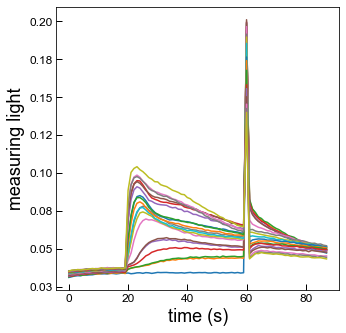

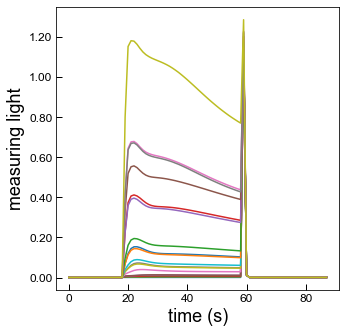

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
V = VoltageIntensity(folder = "2022-08-10_13_47_bode_diagram")
F0 = []
FM = []
I = []
fd = []
fs = []
FS = []
FDS = []
FDM = []
p.ylabel = "measuring light"
p.xlabel = "time (s)"
fig1 = p.set_figure("%d", "%0.2f")
ax1 = plt.gca()

fig2 = p.set_figure("%d", "%0.2f")
ax2 = plt.gca()


dark_level= get_dark_level(direc)

for i, exp in enumerate(glob.glob(direc+"/*IBPC*/")):
    with open(exp + "/config.json", 'r') as j:
         contents = json.loads(j.read())
    limit_blue = contents['limit_blue']     
    intensity = V.get_intensity_voltage("blue", contents['actinic_filter'], limit_blue/100)*1e6
    intensity_purple =  V.get_intensity_voltage("purple", 0, 150/100)*1e6
    headers, table = pandas_to_arrays(glob.glob(exp+"/*IBPC_pulse.csv")[0])
    if contents["limit_green"] !=0 :#and limit_blue not in [40,50, 10]:
        y = table[2] - dark_level
        YD = np.array(table[6])
        ax1.plot(table[1], table[2])
        ax2.plot(table[5], table[6])
        F0.append(np.mean(y[5:10]))
        FM.append(y[60])
        FS.append(np.mean(y[20:22]))
        fd.append(YD[30:58]/intensity)
        fs.append(table[2][30:58])
        I.append(intensity)
        FDS.append(np.mean(YD[20:22])/intensity)
        FDM.append(YD[59]*250/(200*intensity_purple+50*intensity))
I = np.array(I)
FM = np.array(FM)
F0 = np.array(F0)
FS = np.array(FS)
FDS = np.array(FDS[1:])
FDM = np.array(FDM[1:])

p.save_name = 'curves_fs'
u = p.saving(fig1)
p.save_name = 'curves_FD'
u = p.saving(fig2)

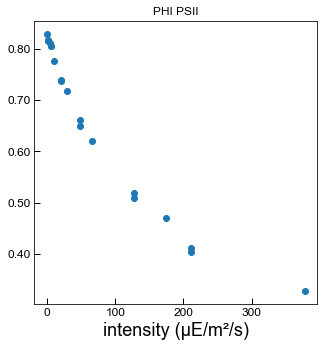

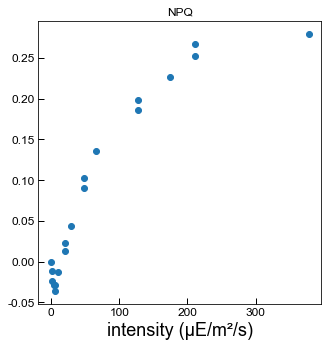

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [7]:
fig1 = p.set_figure("%d", "%0.2f")
ax1 = plt.gca()

fig2 = p.set_figure("%d", "%0.2f")
ax2 = plt.gca()

ax1.scatter(I, (FM-FS)/FM)

ax1.set_title("PHI PSII")
ax1.set_xlabel("intensity (µE/m²/s)")
#ax1.set_ylim(0,1)

ax2.scatter(I, (FM[0]-FM)/FM[0])
ax2.set_title("NPQ")
ax2.set_xlabel("intensity (µE/m²/s)")

p.save_name = 'metrics_QY'
u = p.saving(fig1)

p.save_name = 'metrics_NPQ'
u = p.saving(fig2)

# compare FD/I, FS

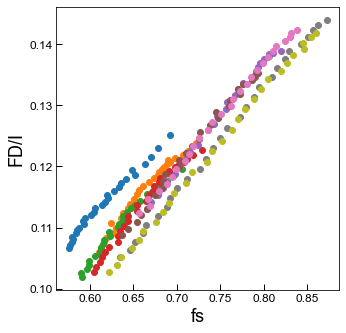

<Figure size 432x288 with 0 Axes>

In [119]:
k = 9
fig = p.set_figure("%0.2f", "%0.2f")
for i in range(len(fs)-k-1):
    plt.scatter(fs[k+i]*10,fd[k+i]*50, label = i)

plt.xlabel("fs")
plt.ylabel("FD/I")
p.save_name = 'fs_FDI_eq'

u = p.saving(fig)


# PAM param same leaf as OJIP

In [10]:
direc = "LEAF_OJIP_PULSE_PULSE/"

LEAF_OJIP_PULSE_PULSE\2022-08-12_17_51_IBPC_pulse\
LEAF_OJIP_PULSE_PULSE\2022-08-12_17_56_IBPC_pulse\
LEAF_OJIP_PULSE_PULSE\2022-08-12_17_58_IBPC_pulse\


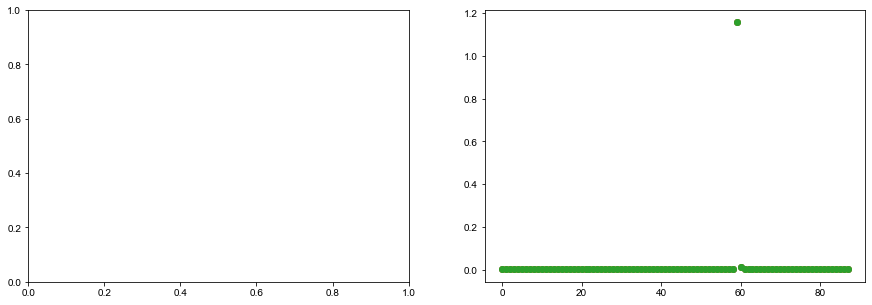

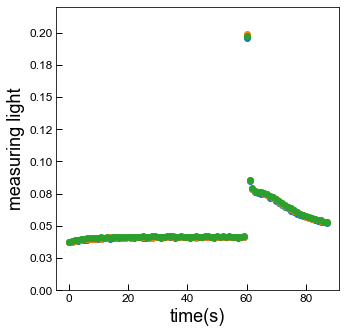

<Figure size 432x288 with 0 Axes>

In [16]:
V = VoltageIntensity(folder = "2022-08-10_13_47_bode_diagram")
F0 = []
FM = []
I = []

fig, axs = plt.subplots(1,2, figsize = (15,5))
fig = p.set_figure("%d", "%0.2f")
for i, exp in enumerate(glob.glob(direc+"/*/")[-3:]):
    print(exp)
    with open(exp + "/config.json", 'r') as j:
         contents = json.loads(j.read())
    limit_blue = contents['limit_blue']     
    intensity = V.get_intensity_voltage("blue", contents['actinic_filter'], limit_blue/100)*1e6
    headers, table = pandas_to_arrays(glob.glob(exp+"/*IBPC_pulse.csv")[0])
    if contents["limit_green"] !=0 :#and limit_blue not in [40,50, 10]:
        y = table[2] - dark_level
        plt.plot(table[2],"o")
        plt.ylim(0, 0.22)
        plt.xlabel('time(s)')
        plt.ylabel('measuring light')
        
        axs[1].plot(table[6], "o")
        F0.append(np.mean(y[5:10]))
        FM.append(y[60])
        I.append(intensity)
        
p.save_name = "qyield"
p.saving(fig)
I = np.array(I)
FM = np.array(FM)
F0 = np.array(F0)

Text(0.5, 0, 'intensity (µE/m²/s)')

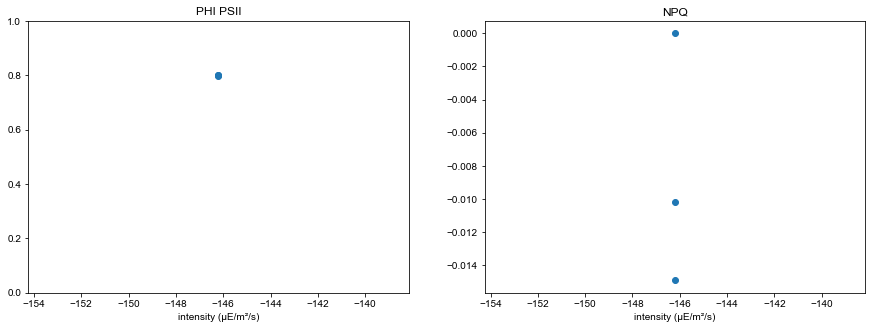

In [106]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
axs[0].scatter(I, (FM-F0)/FM)
axs[0].set_title("PHI PSII")
axs[0].set_xlabel("intensity (µE/m²/s)")
axs[0].set_ylim(0,1)

axs[1].scatter(I, (FM[0]-FM)/FM[0])
axs[1].set_title("NPQ")
axs[1].set_xlabel("intensity (µE/m²/s)")


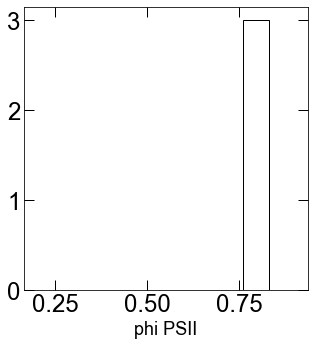

<Figure size 432x288 with 0 Axes>

In [108]:
fig = p.set_figure("%0.2f", "%d")
ax = plt.gca()


p.save_name = "leaf_QY_hist"
p.extension = ".png"
plt.xlabel(r"phi PSII")
plt.ylabel("")
# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=24, direction = 'in', top = True, right = True, length = 10 )
_, bins, _ = plt.hist((FM-F0)/FM, bins=10, range = [0.2,0.9], density= False, alpha=1, facecolor = "white", edgecolor = "black")

u = p.saving(fig)



In [222]:
intensity = V.get_intensity_voltage("blue", 1, 40/100)*1e6
intensity_purple =  V.get_intensity_voltage("purple", 0, 150/100)*1e6

In [241]:
FM = 0.5/intensity_purple

In [246]:
FD = 0.01/intensity

In [247]:
FM

0.00036919466481105407

In [248]:
FD

0.00021231991737466482

In [249]:
(FM-FD)/FM

0.42491065659541527